# Compute the phase-resolved modulation index

In [1]:
import numpy as np
from scipy.fft import fft, fftshift, ifft, irfft, rfft
import psrchive
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from plotting import plot_intrinsic_vs_observed
import copy
import pickle
import importlib
import sys
import time
mpl.rcParams["image.aspect"] = "auto"

## Load two data files and compute the phase-resolved mean and variance

The periodic spectra are first integrated over all frequency channels

In [2]:
zap_edges = 0.05556
count = 0
for filename in { "P2067/chan07/53873.27864.07.15s.pb2", "P2067/chan07/53873.31676.07.15s.pb2" }:
    print (f"loading {filename}")

    ar = psrchive.Archive_load(filename)
    ar.pscrunch()
    ar.fscrunch()
    ar.remove_baseline()
    data = ar.get_data()
        
    nsub, npol, nchan, nbin = data.shape
    print (f"nsubint={nsub} npol={npol} nchan={nchan} nbin={nbin}")
    
    for i in range (nsub):
        ps = data[i,0]
        pc = ps[0]
        if count == 0:
            mean = pc
            var = pc**2
        else:
            mean += pc
            var += pc**2
        count += 1
        
mean /= count
var /= count
var -= mean**2

with open ("mean_pc.pkl", "wb") as fh:
    pickle.dump(mean, fh)
with open ("var_pc.pkl", "wb") as fh:
    pickle.dump(var, fh)

loading P2067/chan07/53873.31676.07.15s.pb2
nsubint=232 npol=1 nchan=1 nbin=512
loading P2067/chan07/53873.27864.07.15s.pb2
nsubint=236 npol=1 nchan=1 nbin=512


## Plot the mean and (logarithm of) the variance

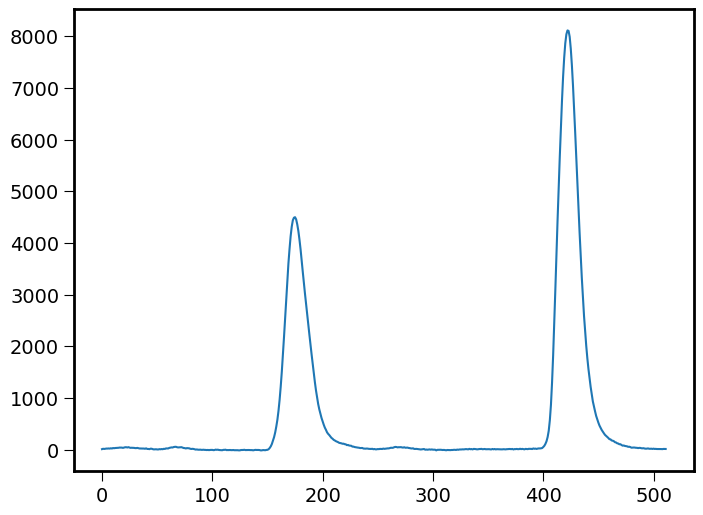

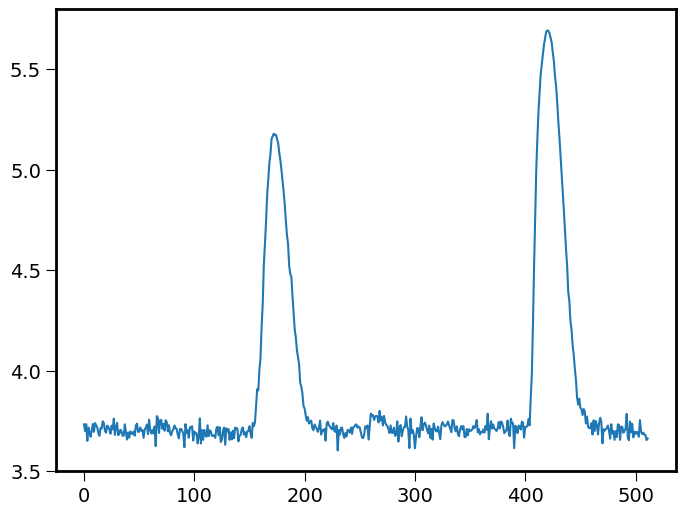

In [3]:
plt.plot(mean)
plt.show()

plt.plot(np.log10(var))
plt.show()

## Plot the phase-resolved modulation index

To avoid division by small values where the mean approaches zero, a minimum flux threshold that is 10 times the standard deviation (estimated from the mean of 100 off-pulse phase bins in the variance profile) is applied

cutoff flux=714.0621948242188


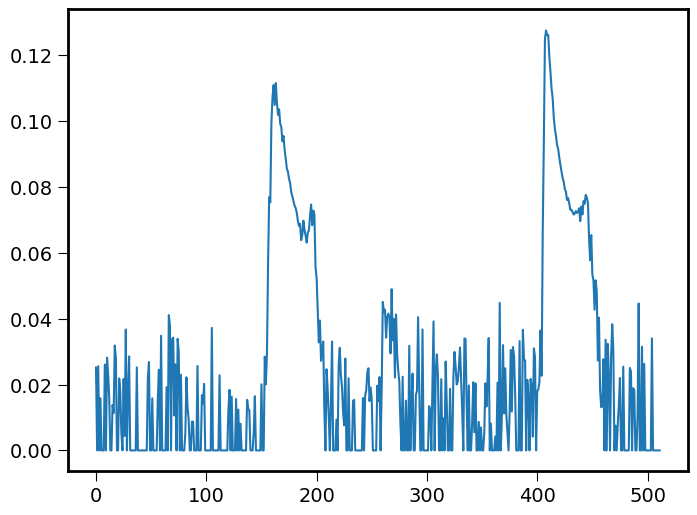

In [4]:
mean_var_off = np.mean(var[0:100])
cutoff=10*np.sqrt(mean_var_off)
print(f"cutoff flux={cutoff}")
plt.plot(np.sqrt(np.maximum(var-mean_var_off,0)) / np.maximum(mean,cutoff))